# Parameters

In [ ]:
from model_unet import Unet

import albumentations as A
train_aug = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.Rotate(limit=10, p=0.3),
])

params={    
    'model_func' : Unet,
    'model_params' : {
        'img_height' : 512,
        'img_width'  : 512,
        'nclasses'   : 8
    },
    'gen_params' : {'batch_size':4,
                    'dim':(512,512),
                    },
    'metrics' : [
            # dice_coeff,
            'accuracy'],
    'train_step_per_epoch' : None, #sample/batch_size
    'val_step_per_epoch' : None,
    'num_epochs' : 8,
    'training_description' : 'cityscape segmentation experiments',
    'model_name' : 'Unet',
    }


2025-10-01 11:30:45.230465: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-01 11:30:45.257452: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759311045.283698   15339 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759311045.294670   15339 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1759311045.319937   15339 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

# Run



In [ ]:
from mlflow_tools import cityscape_experiment,start_local_experiment

start_local_experiment()

mlflow server --host 127.0.0.1  --port 8080 

                mlflow ui --backend-store-uri /mlruns


INFO:     Uvicorn running on http://127.0.0.1:8080 (Press CTRL+C to quit)
INFO:     Started parent process [15454]
INFO:     Started server process [15456]
INFO:     Waiting for application startup.
INFO:     Started server process [15458]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Application startup complete.
INFO:     Started server process [15459]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Started server process [15457]
INFO:     Waiting for application startup.
INFO:     Application startup complete.


INFO:     127.0.0.1:39098 - "GET /api/2.0/mlflow/experiments/get-by-name?experiment_name=cityscape HTTP/1.1" 200 OK


INFO:     127.0.0.1:58664 - "POST /ajax-api/2.0/mlflow/runs/search HTTP/1.1" 200 OK


I0000 00:00:1759311069.147685   15339 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9711 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:0a:00.0, compute capability: 8.6
/home/d0t/miniconda3/envs/tf-wsl/lib/python3.12/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In train:

Number of images: 2975
Number of masks: 2975
Number of unique mask values: 16
Unique values: [ 0.  1.  3.  4.  7.  8. 11. 17. 20. 21. 22. 23. 24. 25. 26. 33.]
In val:

Number of images: 500
Number of masks: 500
Number of unique mask values: 14
Unique values: [ 1.  2.  3.  4.  7.  8. 11. 13. 17. 20. 21. 23. 24. 26.]


2025/10/01 11:31:12 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '2f92c7032cf24d5ea649405c60bd3437', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow


INFO:     127.0.0.1:58670 - "POST /api/2.0/mlflow/runs/create HTTP/1.1" 200 OK
INFO:     127.0.0.1:58670 - "POST /api/2.0/mlflow/runs/log-parameter HTTP/1.1" 200 OK
INFO:     127.0.0.1:58670 - "POST /api/2.0/mlflow/runs/log-batch HTTP/1.1" 200 OK
INFO:     127.0.0.1:58670 - "POST /api/2.0/mlflow/runs/log-batch HTTP/1.1" 200 OK


2025/10/01 11:31:13 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'cityscape_generator.CityscapeDataGenerator'>. Dataset logging skipped.
2025/10/01 11:31:13 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'cityscape_generator.CityscapeDataGenerator'>. Dataset logging skipped.


INFO:     127.0.0.1:58670 - "POST /api/2.0/mlflow/logged-models HTTP/1.1" 200 OK


/home/d0t/miniconda3/envs/tf-wsl/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


INFO:     127.0.0.1:58664 - "POST /ajax-api/2.0/mlflow/runs/search HTTP/1.1" 200 OK
INFO:     127.0.0.1:58670 - "POST /api/2.0/mlflow/runs/log-batch HTTP/1.1" 200 OK


INFO:     127.0.0.1:58670 - "GET /api/2.0/mlflow/runs/get?run_uuid=2f92c7032cf24d5ea649405c60bd3437&run_id=2f92c7032cf24d5ea649405c60bd3437 HTTP/1.1" 200 OK
INFO:     127.0.0.1:58670 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/2f92c7032cf24d5ea649405c60bd3437/artifacts/model_summary.txt HTTP/1.1" 200 OK
Epoch 1/8


I0000 00:00:1759311082.978194   15676 service.cc:152] XLA service 0x7fce5c0571c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1759311082.978359   15676 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-10-01 11:31:23.296638: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1759311084.589358   15676 cuda_dnn.cc:529] Loaded cuDNN version 91002
2025-10-01 11:31:27.995036: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 16.39GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-10-01 11:31:28.437270: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran ou

INFO:     127.0.0.1:58068 - "POST /ajax-api/2.0/mlflow/runs/search HTTP/1.1" 200 OK
INFO:     127.0.0.1:58090 - "GET /ajax-api/2.0/mlflow/metrics/get-history-bulk-interval?run_ids=2f92c7032cf24d5ea649405c60bd3437&metric_key=val_accuracy&max_results=320 HTTP/1.1" 200 OK
INFO:     127.0.0.1:58098 - "GET /ajax-api/2.0/mlflow/metrics/get-history-bulk-interval?run_ids=2f92c7032cf24d5ea649405c60bd3437&metric_key=val_loss&max_results=320 HTTP/1.1" 200 OK
INFO:     127.0.0.1:58080 - "GET /ajax-api/2.0/mlflow/metrics/get-history-bulk-interval?run_ids=2f92c7032cf24d5ea649405c60bd3437&metric_key=loss&max_results=320 HTTP/1.1" 200 OK
INFO:     127.0.0.1:58068 - "GET /ajax-api/2.0/mlflow/metrics/get-history-bulk-interval?run_ids=2f92c7032cf24d5ea649405c60bd3437&metric_key=accuracy&max_results=320 HTTP/1.1" 200 OK


2025-10-01 11:31:41.198951: E external/local_xla/xla/service/slow_operation_alarm.cc:73] Trying algorithm eng0{} for conv %cudnn-conv-bw-input.30 = (f32[4,128,512,512]{3,2,1,0}, u8[0]{0}) custom-call(f32[4,64,512,512]{3,2,1,0} %bitcast.34162, f32[64,128,3,3]{3,2,1,0} %bitcast.34099), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardInput", metadata={op_type="Conv2DBackpropInput" op_name="gradient_tape/Unet_1/conv2d_16_1/convolution/Conv2DBackpropInput" source_file="/home/d0t/miniconda3/envs/tf-wsl/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false} is taking a while...
2025-10-01 11:31:41.390158: E external/local_xla/xla/service/slow_operation_alarm.cc:140] The operation took 1.19315484

INFO:     127.0.0.1:58068 - "POST /ajax-api/2.0/mlflow/runs/search HTTP/1.1" 200 OK


2025-10-01 11:31:59.650348: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 16.20GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-10-01 11:31:59.411598: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 16.53GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


INFO:     127.0.0.1:51034 - "POST /ajax-api/2.0/mlflow/runs/search HTTP/1.1" 200 OK
INFO:     127.0.0.1:51034 - "POST /ajax-api/2.0/mlflow/runs/search HTTP/1.1" 200 OK


I0000 00:00:1759311138.806760   15676 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 42/743 ━━━━━━━━━━━━━━━━━━━━ 6:42 574ms/step - accuracy: 0.4811 - loss: 1.6758INFO:     127.0.0.1:49668 - "POST /ajax-api/2.0/mlflow/runs/search HTTP/1.1" 200 OK
 50/743 ━━━━━━━━━━━━━━━━━━━━ 6:45 585ms/step - accuracy: 0.5024 - loss: 1.6301INFO:     127.0.0.1:49668 - "POST /ajax-api/2.0/mlflow/runs/search HTTP/1.1" 200 OK
 96/743 ━━━━━━━━━━━━━━━━━━━━ 6:17 584ms/step - accuracy: 0.5743 - loss: 1.4720INFO:     127.0.0.1:59914 - "POST /ajax-api/2.0/mlflow/runs/search HTTP/1.1" 200 OK
103/743 ━━━━━━━━━━━━━━━━━━━━ 6:15 587ms/step - accuracy: 0.5817 - loss: 1.4551INFO:     127.0.0.1:59914 - "POST /ajax-api/2.0/mlflow/runs/search HTTP/1.1" 200 OK
150/743 ━━━━━━━━━━━━━━━━━━━━ 5:47 586ms/step - accuracy: 0.6187 - loss: 1.3672INFO:     127.0.0.1:47462 - "POST /ajax-api/2.0/mlflow/runs/search HTTP/1.1" 200 OK
158/743 ━━━━━━━━━━━━━━━━━━━━ 5:44 589ms/step - accuracy: 0.6234 - loss: 1.3557INFO:     127.0.0.1:47462 - "POST /ajax-api/2.0/mlflow/runs/search HTTP/1.1" 200 OK
204/743 ━━━━━━━━━━━━━━━━━━━━

INFO:     127.0.0.1:36888 - "GET /api/2.0/mlflow/runs/get?run_uuid=2f92c7032cf24d5ea649405c60bd3437&run_id=2f92c7032cf24d5ea649405c60bd3437 HTTP/1.1" 200 OK
INFO:     127.0.0.1:36878 - "POST /api/2.0/mlflow/runs/set-tag HTTP/1.1" 200 OK
INFO:     127.0.0.1:36888 - "POST /api/2.0/mlflow/runs/log-batch HTTP/1.1" 200 OK
INFO:     127.0.0.1:36878 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/2f92c7032cf24d5ea649405c60bd3437/artifacts/checkpoints/latest_checkpoint_metrics.json HTTP/1.1" 200 OK
INFO:     127.0.0.1:59830 - "POST /ajax-api/2.0/mlflow/runs/search HTTP/1.1" 200 OK
INFO:     127.0.0.1:59834 - "POST /ajax-api/2.0/mlflow/runs/search HTTP/1.1" 200 OK
INFO:     127.0.0.1:57338 - "POST /ajax-api/2.0/mlflow/runs/search HTTP/1.1" 200 OK
INFO:     127.0.0.1:57340 - "POST /ajax-api/2.0/mlflow/runs/search HTTP/1.1" 200 OK
INFO:     127.0.0.1:36888 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/2f92c7032cf24d5ea649405c60bd3437/artifacts/checkpoints/latest_chec

INFO:     127.0.0.1:55342 - "GET /api/2.0/mlflow/runs/get?run_uuid=2f92c7032cf24d5ea649405c60bd3437&run_id=2f92c7032cf24d5ea649405c60bd3437 HTTP/1.1" 200 OK
INFO:     127.0.0.1:35246 - "POST /api/2.0/mlflow/runs/set-tag HTTP/1.1" 200 OK
INFO:     127.0.0.1:55342 - "POST /api/2.0/mlflow/runs/log-batch HTTP/1.1" 200 OK
INFO:     127.0.0.1:35246 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/2f92c7032cf24d5ea649405c60bd3437/artifacts/checkpoints/latest_checkpoint_metrics.json HTTP/1.1" 200 OK
INFO:     127.0.0.1:57894 - "POST /ajax-api/2.0/mlflow/runs/search HTTP/1.1" 200 OK
INFO:     127.0.0.1:57894 - "POST /ajax-api/2.0/mlflow/runs/search HTTP/1.1" 200 OK
INFO:     127.0.0.1:55342 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/2f92c7032cf24d5ea649405c60bd3437/artifacts/checkpoints/latest_checkpoint.h5 HTTP/1.1" 200 OK
743/743 ━━━━━━━━━━━━━━━━━━━━ 544s 732ms/step - accuracy: 0.8493 - loss: 0.5512 - val_accuracy: 0.8425 - val_loss: 0.5432
Epoch 3/8
 10/743 ━━

INFO:     127.0.0.1:58136 - "GET /api/2.0/mlflow/runs/get?run_uuid=2f92c7032cf24d5ea649405c60bd3437&run_id=2f92c7032cf24d5ea649405c60bd3437 HTTP/1.1" 200 OK
INFO:     127.0.0.1:58134 - "POST /api/2.0/mlflow/runs/set-tag HTTP/1.1" 200 OK
INFO:     127.0.0.1:58134 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/2f92c7032cf24d5ea649405c60bd3437/artifacts/checkpoints/latest_checkpoint_metrics.json HTTP/1.1" 200 OK
INFO:     127.0.0.1:58136 - "POST /api/2.0/mlflow/runs/log-batch HTTP/1.1" 200 OK
INFO:     127.0.0.1:46172 - "POST /ajax-api/2.0/mlflow/runs/search HTTP/1.1" 200 OK
INFO:     127.0.0.1:52182 - "POST /ajax-api/2.0/mlflow/runs/search HTTP/1.1" 200 OK
INFO:     127.0.0.1:43246 - "GET /ajax-api/2.0/mlflow/model-versions/search?filter=run_id%3D%27cec3bc27740741a194cb9cf78c49ff08%27 HTTP/1.1" 200 OK
INFO:     127.0.0.1:43230 - "GET /ajax-api/2.0/mlflow/model-versions/search?filter=tags.%60mlflow.prompt.is_prompt%60+%3D+%27true%27+AND+tags.%60mlflow.prompt.run_ids%60+ILIK

INFO:     127.0.0.1:45290 - "GET /api/2.0/mlflow/runs/get?run_uuid=2f92c7032cf24d5ea649405c60bd3437&run_id=2f92c7032cf24d5ea649405c60bd3437 HTTP/1.1" 200 OK
INFO:     127.0.0.1:45286 - "POST /api/2.0/mlflow/runs/set-tag HTTP/1.1" 200 OK
INFO:     127.0.0.1:45290 - "POST /api/2.0/mlflow/runs/log-batch HTTP/1.1" 200 OK
INFO:     127.0.0.1:45286 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/2f92c7032cf24d5ea649405c60bd3437/artifacts/checkpoints/latest_checkpoint_metrics.json HTTP/1.1" 200 OK
INFO:     127.0.0.1:45188 - "POST /ajax-api/2.0/mlflow/runs/search HTTP/1.1" 200 OK
INFO:     127.0.0.1:45188 - "POST /ajax-api/2.0/mlflow/runs/search HTTP/1.1" 200 OK
INFO:     127.0.0.1:42350 - "POST /ajax-api/2.0/mlflow/runs/search HTTP/1.1" 200 OK
INFO:     127.0.0.1:42350 - "POST /ajax-api/2.0/mlflow/runs/search HTTP/1.1" 200 OK
INFO:     127.0.0.1:45290 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/2f92c7032cf24d5ea649405c60bd3437/artifacts/checkpoints/latest_chec

2025/10/01 12:16:53 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: unsupported operand type(s) for *: 'slice' and 'int'
2025/10/01 12:16:53 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


INFO:     127.0.0.1:48530 - "POST /api/2.0/mlflow/runs/log-batch HTTP/1.1" 200 OK
INFO:     127.0.0.1:48526 - "GET /api/2.0/mlflow/logged-models/m-24d6bedf74f742cdbd5e0edcb21320ac HTTP/1.1" 200 OK
INFO:     127.0.0.1:48526 - "POST /api/2.0/mlflow/runs/outputs HTTP/1.1" 200 OK
INFO:     127.0.0.1:48526 - "GET /api/2.0/mlflow/runs/get?run_uuid=2f92c7032cf24d5ea649405c60bd3437&run_id=2f92c7032cf24d5ea649405c60bd3437 HTTP/1.1" 200 OK
INFO:     127.0.0.1:48526 - "GET /api/2.0/mlflow/metrics/get-history?run_uuid=2f92c7032cf24d5ea649405c60bd3437&metric_key=accuracy&run_id=2f92c7032cf24d5ea649405c60bd3437&max_results=25000 HTTP/1.1" 200 OK
INFO:     127.0.0.1:48526 - "GET /api/2.0/mlflow/metrics/get-history?run_uuid=2f92c7032cf24d5ea649405c60bd3437&metric_key=loss&run_id=2f92c7032cf24d5ea649405c60bd3437&max_results=25000 HTTP/1.1" 200 OK
INFO:     127.0.0.1:48526 - "GET /api/2.0/mlflow/metrics/get-history?run_uuid=2f92c7032cf24d5ea649405c60bd3437&metric_key=validation_accuracy&run_id=2f92c7032

2025/10/01 12:16:54 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:     127.0.0.1:48526 - "POST /api/2.0/mlflow/runs/log-batch HTTP/1.1" 200 OK
INFO:     127.0.0.1:48542 - "POST /ajax-api/2.0/mlflow/runs/search HTTP/1.1" 200 OK
INFO:     127.0.0.1:46828 - "POST /ajax-api/2.0/mlflow/runs/search HTTP/1.1" 200 OK


2025/10/01 12:17:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


INFO:     127.0.0.1:49474 - "GET /api/2.0/mlflow/logged-models/m-24d6bedf74f742cdbd5e0edcb21320ac HTTP/1.1" 200 OK
INFO:     127.0.0.1:49474 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/models/m-24d6bedf74f742cdbd5e0edcb21320ac/artifacts/conda.yaml HTTP/1.1" 200 OK
INFO:     127.0.0.1:49474 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/models/m-24d6bedf74f742cdbd5e0edcb21320ac/artifacts/python_env.yaml HTTP/1.1" 200 OK
INFO:     127.0.0.1:49474 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/models/m-24d6bedf74f742cdbd5e0edcb21320ac/artifacts/MLmodel HTTP/1.1" 200 OK
INFO:     127.0.0.1:49474 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/models/m-24d6bedf74f742cdbd5e0edcb21320ac/artifacts/requirements.txt HTTP/1.1" 200 OK
INFO:     127.0.0.1:60590 - "POST /ajax-api/2.0/mlflow/runs/search HTTP/1.1" 200 OK
INFO:     127.0.0.1:38858 - "POST /ajax-api/2.0/mlflow/runs/search HTTP/1.1" 200 OK
INFO:     127.0.0.1:43796 - "POST /aj

2025/10/01 12:18:20 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.


INFO:     127.0.0.1:53832 - "GET /api/2.0/mlflow/runs/get?run_uuid=f62f168702ff472dbc599108ac04e5ac&run_id=f62f168702ff472dbc599108ac04e5ac HTTP/1.1" 200 OK


2025/10/01 12:18:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


INFO:     127.0.0.1:41332 - "GET /api/2.0/mlflow/logged-models/m-6224c5eef06a49c5b1ea33879ec8922f HTTP/1.1" 200 OK
INFO:     127.0.0.1:41332 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/models/m-6224c5eef06a49c5b1ea33879ec8922f/artifacts/conda.yaml HTTP/1.1" 200 OK
INFO:     127.0.0.1:41332 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/models/m-6224c5eef06a49c5b1ea33879ec8922f/artifacts/python_env.yaml HTTP/1.1" 200 OK
INFO:     127.0.0.1:41332 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/models/m-6224c5eef06a49c5b1ea33879ec8922f/artifacts/MLmodel HTTP/1.1" 200 OK
INFO:     127.0.0.1:41332 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/models/m-6224c5eef06a49c5b1ea33879ec8922f/artifacts/requirements.txt HTTP/1.1" 200 OK
INFO:     127.0.0.1:59916 - "POST /ajax-api/2.0/mlflow/runs/search HTTP/1.1" 200 OK
INFO:     127.0.0.1:33196 - "POST /ajax-api/2.0/mlflow/runs/search HTTP/1.1" 200 OK
INFO:     127.0.0.1:41330 - "POST /aj

Registered model 'Unet' already exists. Creating a new version of this model...
2025/10/01 12:19:21 ERROR mlflow.webhooks.delivery: Failed to deliver webhook for event model_version.created: FileStore does not support list_webhooks_by_event
Traceback (most recent call last):
  File "/home/d0t/miniconda3/envs/tf-wsl/lib/python3.12/site-packages/mlflow/webhooks/delivery.py", line 304, in deliver_webhook
    _deliver_webhook_impl(event=event, payload=payload, store=store)
  File "/home/d0t/miniconda3/envs/tf-wsl/lib/python3.12/site-packages/mlflow/webhooks/delivery.py", line 285, in _deliver_webhook_impl
    webhooks = _get_cached_webhooks_by_event(store, event, ttl_seconds)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/d0t/miniconda3/envs/tf-wsl/lib/python3.12/site-packages/mlflow/webhooks/delivery.py", line 249, in _get_cached_webhooks_by_event
    page = store.list_webhooks_by_event(event, max_results=100, page_token=page_token)
           ^^^^^^

INFO:     127.0.0.1:41332 - "POST /api/2.0/mlflow/model-versions/create HTTP/1.1" 200 OK
INFO:     127.0.0.1:41332 - "GET /api/2.0/mlflow/logged-models/m-6224c5eef06a49c5b1ea33879ec8922f HTTP/1.1" 200 OK
INFO:     127.0.0.1:41332 - "GET /api/2.0/mlflow/logged-models/m-6224c5eef06a49c5b1ea33879ec8922f HTTP/1.1" 200 OK
INFO:     127.0.0.1:41332 - "PATCH /api/2.0/mlflow/logged-models/m-6224c5eef06a49c5b1ea33879ec8922f/tags HTTP/1.1" 200 OK
INFO:     127.0.0.1:41332 - "POST /api/2.0/mlflow/runs/log-batch HTTP/1.1" 200 OK
INFO:     127.0.0.1:41332 - "GET /api/2.0/mlflow/logged-models/m-6224c5eef06a49c5b1ea33879ec8922f HTTP/1.1" 200 OK
INFO:     127.0.0.1:41332 - "PATCH /api/2.0/mlflow/logged-models/m-6224c5eef06a49c5b1ea33879ec8922f/tags HTTP/1.1" 200 OK
INFO:     127.0.0.1:41332 - "GET /api/2.0/mlflow/runs/get?run_uuid=f62f168702ff472dbc599108ac04e5ac&run_id=f62f168702ff472dbc599108ac04e5ac HTTP/1.1" 200 OK
🏃 View run honorable-shrimp-945 at: http://127.0.0.1:8080/#/experiments/37288652569

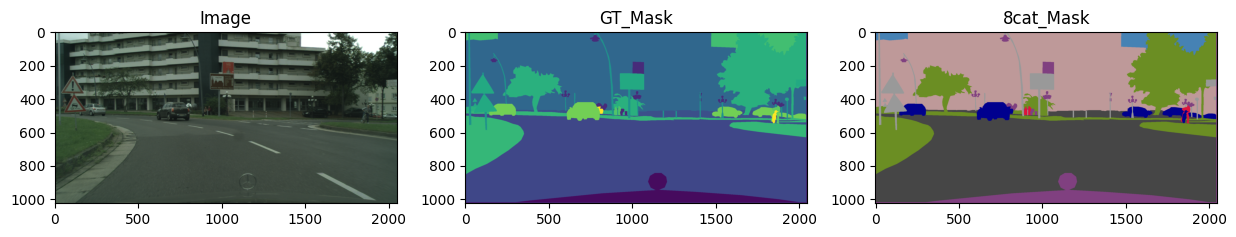

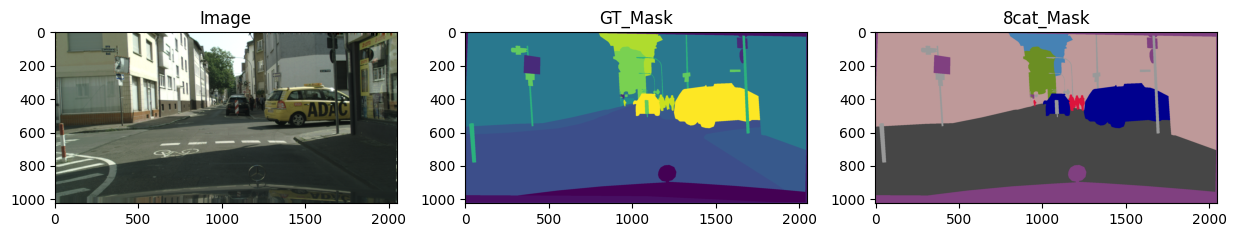

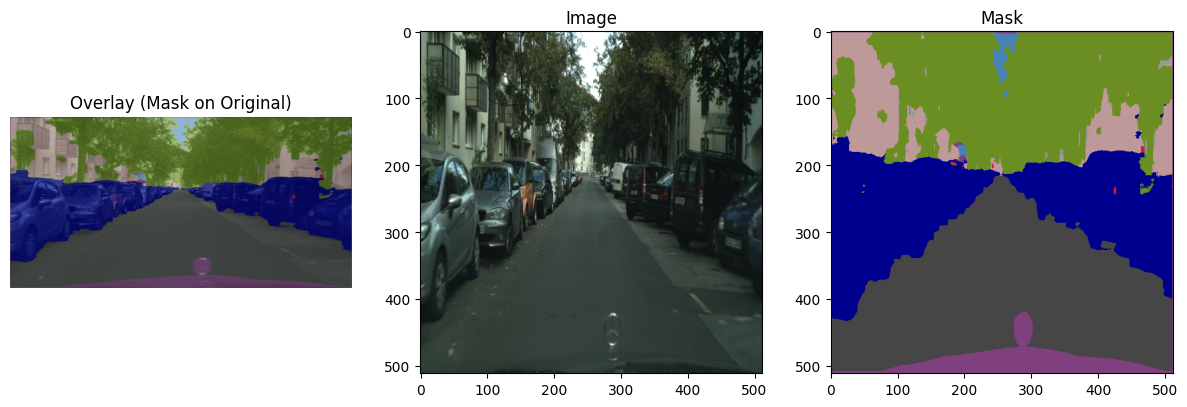

INFO:     127.0.0.1:53564 - "POST /ajax-api/2.0/mlflow/runs/search HTTP/1.1" 200 OK
INFO:     127.0.0.1:53564 - "POST /ajax-api/2.0/mlflow/runs/search HTTP/1.1" 200 OK
INFO:     127.0.0.1:48860 - "POST /ajax-api/2.0/mlflow/runs/search HTTP/1.1" 200 OK
INFO:     127.0.0.1:48860 - "POST /ajax-api/2.0/mlflow/runs/search HTTP/1.1" 200 OK
INFO:     127.0.0.1:40622 - "POST /ajax-api/2.0/mlflow/runs/search HTTP/1.1" 200 OK
INFO:     127.0.0.1:40622 - "POST /ajax-api/2.0/mlflow/runs/search HTTP/1.1" 200 OK
INFO:     127.0.0.1:54726 - "POST /ajax-api/2.0/mlflow/runs/search HTTP/1.1" 200 OK
INFO:     127.0.0.1:54726 - "POST /ajax-api/2.0/mlflow/runs/search HTTP/1.1" 200 OK
INFO:     127.0.0.1:46642 - "POST /ajax-api/2.0/mlflow/runs/search HTTP/1.1" 200 OK
INFO:     127.0.0.1:46642 - "POST /ajax-api/2.0/mlflow/runs/search HTTP/1.1" 200 OK
INFO:     127.0.0.1:38908 - "POST /ajax-api/2.0/mlflow/runs/search HTTP/1.1" 200 OK
INFO:     127.0.0.1:38908 - "POST /ajax-api/2.0/mlflow/runs/search HTTP/1.1"

In [ ]:
from mlflow_tools import cityscape_experiment
cityscape_experiment(**params)